Name: Muley, Tushar

Assignment: Week 5 Assignment 5.2 Hotel Recommendation

Date: July 11, 2021

Description: Online travel agencies are scrambling to meet the artificial intelligence driven personalization standard set by companies like Amazon and Netflix. In addition, the world of online travel has become a highly competitive space where brands try to capture our attention (and wallet) with recommending, comparing, matching, and sharing. For this assignment, we would like to create the optimal hotel recommendations for Expedia’s users that are searching for a hotel to book.

To get started, I would suggest exploring the file train.csv, which contains the logs of user behavior.  There is another file named destinations.csv, which contains information related to hotel reviews made by users.

Build at least two prediction models from the training set, and report the accuracies on the test set.

In [41]:
#Load common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import sklearn
import random
import operator
import datetime

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split 

In [2]:
#Increase sire of view window
pd.set_option('display.max_columns', None)

In [5]:
# run once to get data than copy to pc
#train = pd.read_csv('train.csv', iterator = True).get_chunk(10000000).dropna()
#train = pd.read_csv('train.csv', sep=',').dropna()
#dest = pd.read_csv('destinations.csv')
#train = train.sample(frac=0.01, random_state=99)
#train.shape

(241179, 24)

In [6]:
# Write file down to csv
train.to_csv('train_lite.csv', index=False)

In [15]:
# csv file name
file = 'destinations.csv'

# initializing the titles and rows list
fields = []
rows = []
  
# reading csv file
with open(file, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)
      
    # extracting field names through first row
    fields = next(csvreader)
  
    # extracting each data row one by one
    for row in csvreader:
        rows.append(row)
  
    # get total number of rows
    print("Total no. of rows: %d"%(csvreader.line_num))

Total no. of rows: 62107


In [3]:
# bring back files for analysis
dest = pd.read_csv('destinations.csv')
train = pd.read_csv('train_lite.csv')

In [4]:
print('The dimension of the destnation table : ', dest.shape)

print('The dimension of the train table : ', train.shape)

The dimension of the destnation table :  (62106, 150)
The dimension of the train table :  (241179, 24)


In [5]:
print("Summarized Data")
print(train.describe(include=['O']))

Summarized Data
                  date_time     srch_ci     srch_co
count                241179      241179      241179
unique               240445        1085        1094
top     2014-11-02 09:46:33  2014-12-26  2014-12-28
freq                      3        1566        1364


In [49]:
# view data in destination
print(destinations.head(5))

   srch_destination_id        d1        d2        d3        d4        d5  \
0                    0 -2.198657 -2.198657 -2.198657 -2.198657 -2.198657   
1                    1 -2.181690 -2.181690 -2.181690 -2.082564 -2.181690   
2                    2 -2.183490 -2.224164 -2.224164 -2.189562 -2.105819   
3                    3 -2.177409 -2.177409 -2.177409 -2.177409 -2.177409   
4                    4 -2.189562 -2.187783 -2.194008 -2.171153 -2.152303   

         d6        d7        d8        d9       d10       d11       d12  \
0 -1.897627 -2.198657 -2.198657 -1.897627 -2.198657 -2.198657 -2.198657   
1 -2.165028 -2.181690 -2.181690 -2.031597 -2.181690 -2.181690 -2.181690   
2 -2.075407 -2.224164 -2.118483 -2.140393 -2.224164 -2.209855 -2.224164   
3 -2.115485 -2.177409 -2.177409 -2.177409 -2.177409 -2.161081 -2.177409   
4 -2.056618 -2.194008 -2.194008 -2.145911 -2.194008 -2.089094 -2.194008   

        d13       d14       d15       d16       d17       d18       d19  \
0 -2.198657 -2.19

In [8]:
# view data
print(train.head(5))

                    date_time  site_name  posa_continent  \
32352134  2014-05-22 11:40:07          2               3   
29796021  2013-06-29 12:24:37          2               3   
15185156  2014-10-30 13:58:32          2               3   
3301948   2014-08-22 20:14:34          2               3   
25429119  2014-03-25 18:47:43          2               3   

          user_location_country  user_location_region  user_location_city  \
32352134                     66                   174               24103   
29796021                     66                   311               25538   
15185156                     66                   294               40046   
3301948                      66                   332               55121   
25429119                     66                   314               47869   

          orig_destination_distance  user_id  is_mobile  is_package  ...  \
32352134                  2323.5232   802499          0           1  ...   
29796021                

In [9]:
print('Describe Data')
print(train.describe())

Describe Data
           site_name  posa_continent  user_location_country  \
count  241179.000000   241179.000000          241179.000000   
mean        6.219650        2.902972              87.833837   
std         9.016623        0.537927              54.548928   
min         2.000000        0.000000               0.000000   
25%         2.000000        3.000000              66.000000   
50%         2.000000        3.000000              66.000000   
75%         2.000000        3.000000              66.000000   
max        53.000000        4.000000             215.000000   

       user_location_region  user_location_city  orig_destination_distance  \
count         241179.000000       241179.000000              241179.000000   
mean             311.466504        27987.797437                1970.282004   
std              143.925625        16527.400909                2232.031046   
min              135.000000            0.000000                   0.005600   
25%              174.000000 

In [11]:
print('Describe Data')
print(dest.describe())

Describe Data
       srch_destination_id            d1            d2            d3  \
count         62106.000000  62106.000000  62106.000000  62106.000000   
mean          32359.463884     -2.193903     -2.202854     -2.207391   
std           18711.765765      0.038576      0.041065      0.040092   
min               0.000000     -2.597617     -2.671613     -2.671613   
25%           16320.250000     -2.209336     -2.220192     -2.223679   
50%           32277.500000     -2.185969     -2.193247     -2.195208   
75%           48467.750000     -2.175309     -2.179261     -2.179990   
max           64993.000000     -1.596004     -1.341325     -1.917826   

                 d4            d5            d6            d7            d8  \
count  62106.000000  62106.000000  62106.000000  62106.000000  62106.000000   
mean      -2.194040     -2.161497     -2.045110     -2.202433     -2.203207   
std        0.041406      0.066197      0.135803      0.038886      0.036578   
min       -2.671613  

<AxesSubplot:title={'center':'All Feature Correlation Heat Map of Destination File'}>

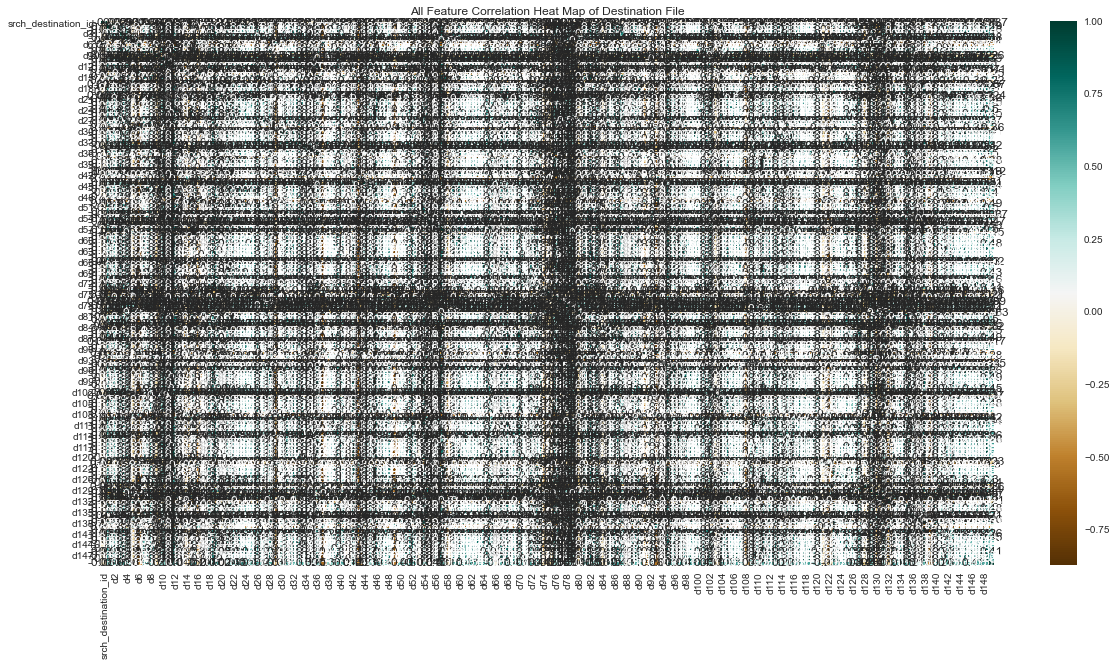

In [53]:
#Run full correlation on the data set using heat map
plt.figure(figsize=(20,10))
c= dest.corr()
plt.title('All Feature Correlation Heat Map of Destination File')
plt.xlabel('Features')
plt.ylabel('Features')
sns.heatmap(c,cmap="BrBG",annot=True)

<AxesSubplot:title={'center':'All Feature Correlation Heat Map of Training File'}>

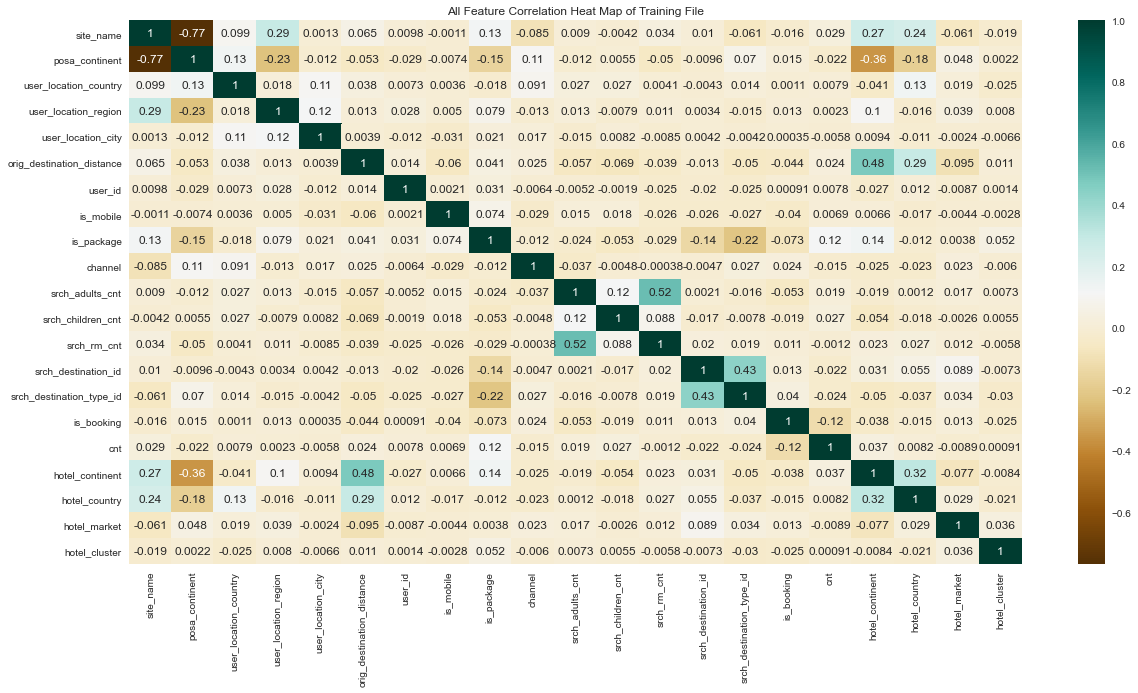

In [54]:
#Run full correlation on the data set using heat map
plt.figure(figsize=(20,10))
c= train.corr()
plt.title('All Feature Correlation Heat Map of Training File')
plt.xlabel('Features')
plt.ylabel('Features')
sns.heatmap(c,cmap="BrBG",annot=True)

In [6]:
#Make a copy before dropping elements
train_copy1 = train.copy(deep=True)

In [36]:
# use if needed
# copy the data in case need to go back
#train = train_copy1.copy(deep=True)

NameError: name 'train_copy1' is not defined

In [7]:
train.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [6]:
# Elements to be dropped
train=train.drop(['posa_continent', 'site_name', 'srch_rm_cnt','srch_adults_cnt', 
                        'srch_children_cnt','srch_destination_type_id',
                        'hotel_continent'], axis=1)

In [7]:
df_train.columns

Index(['date_time', 'user_location_country', 'user_location_region',
       'user_location_city', 'orig_destination_distance', 'user_id',
       'is_mobile', 'is_package', 'channel', 'srch_co', 'srch_destination_id',
       'is_booking', 'cnt', 'hotel_country', 'hotel_market', 'hotel_cluster'],
      dtype='object')

<AxesSubplot:title={'center':'All Feature Correlation Heat Map of Training File'}>

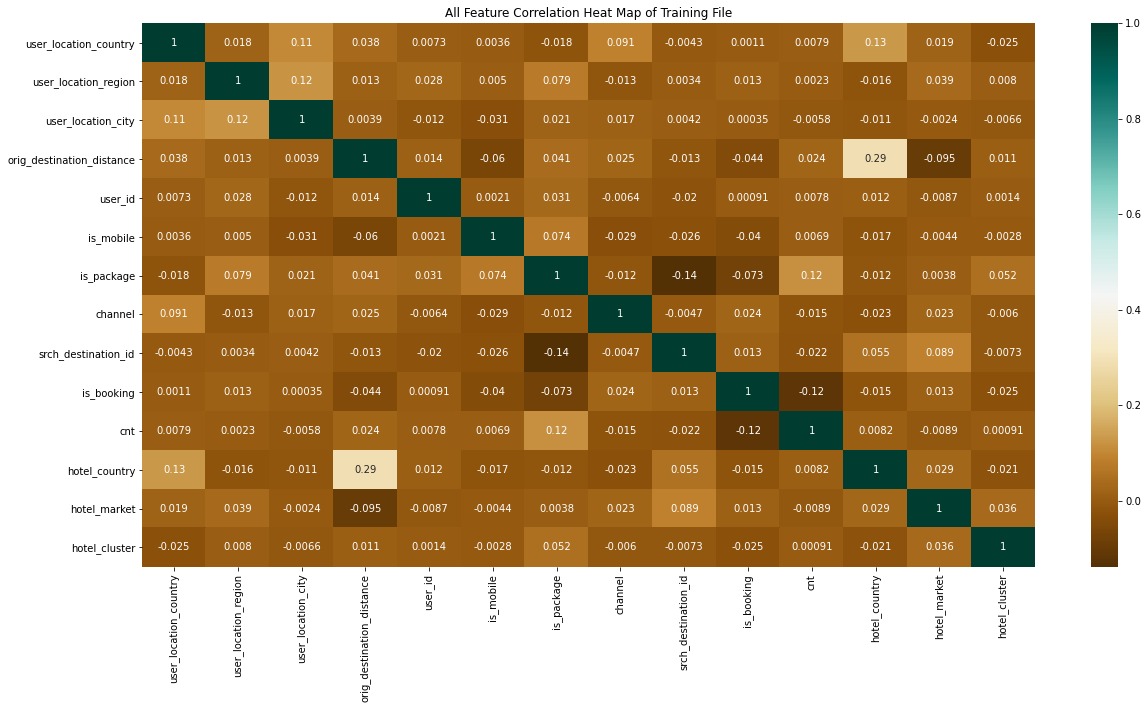

In [8]:
# Run full correlation on the data set using heat map
plt.figure(figsize=(20,10))
c= train.corr()
plt.title('All Feature Correlation Heat Map of Training File')
plt.xlabel('Features')
plt.ylabel('Features')
sns.heatmap(c,cmap="BrBG",annot=True)

In [59]:
train.head()

,date_time,user_location_country,user_location_region,user_location_city,orig_destination_distance,is_mobile,is_package,channel,srch_destination_id,is_booking,cnt,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,66,348,48862,2234.2641,0,1,9,8250,0,3,50,628,1
1,2014-08-11 08:22:12,66,348,48862,2234.2641,0,1,9,8250,1,1,50,628,1
2,2014-08-11 08:24:33,66,348,48862,2234.2641,0,0,9,8250,0,1,50,628,1
3,2014-08-09 18:05:16,66,442,35390,913.1932,0,0,3,14984,0,1,50,1457,80
4,2014-08-09 18:08:18,66,442,35390,913.6259,0,0,3,14984,0,1,50,1457,21


In [60]:
train["hotel_cluster"].value_counts()

91    2777
41    2176
48    2077
64    1984
65    1633
      ... 
35     439
53     359
27     332
88     301
74     125
Name: hotel_cluster, Length: 100, dtype: int64

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hotel_cluster', ylabel='Density'>

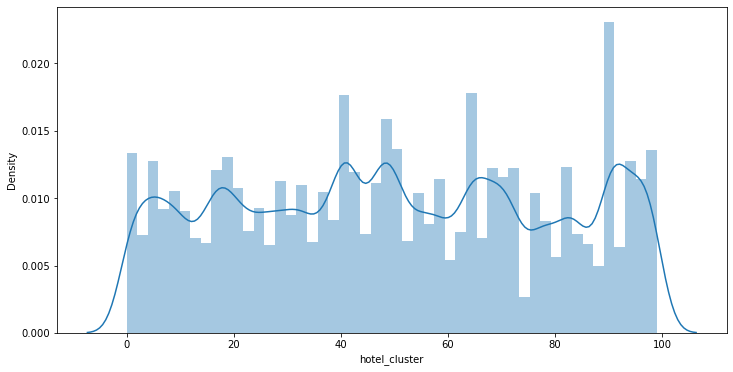

In [8]:
plt.figure(figsize=(12, 6))
sns.distplot(train['hotel_cluster'])

[0.51135723 0.05529065 0.0282286  0.02320444 0.01609184 0.01393583
 0.01118764 0.01026042 0.00941039 0.00808163]


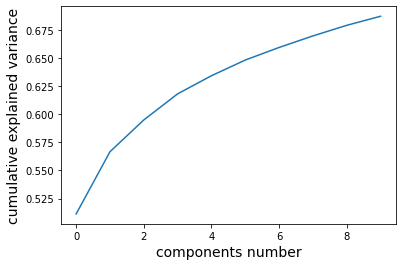

In [23]:
# pca plot of features
pca = PCA(n_components=10)
scaler = preprocessing.StandardScaler()
destinations = scaler.fit_transform(dest)
pca.fit(destinations)
variance = pca.explained_variance_ratio_
print (variance)
cumulative_explained_variance = np.cumsum(variance)
plt.plot(cumulative_explained_variance)
plt.xlabel('components number', fontsize=14)
plt.ylabel('cumulative explained variance', fontsize=14)
plt.show()


[0.51135723 0.05529065 0.02822859 0.02320443 0.01609132 0.01393396
 0.01117312 0.01026071 0.00938215 0.00801961 0.00767812 0.00753141
 0.00734583 0.00715279 0.00696526]


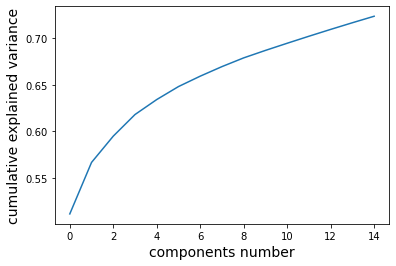

In [54]:
# pca plot of features
pca = PCA(n_components=15)
scaler = preprocessing.StandardScaler()
destinations = scaler.fit_transform(dest)
pca.fit(destinations)
variance = pca.explained_variance_ratio_
print (variance)
cumulative_explained_variance = np.cumsum(variance)
plt.plot(cumulative_explained_variance)
plt.xlabel('components number', fontsize=14)
plt.ylabel('cumulative explained variance', fontsize=14)
plt.show()


In [18]:
# check correlation of hotel_cluster

train.corr()["hotel_cluster"]

site_name                   -0.027497
posa_continent               0.012180
user_location_country       -0.020239
user_location_region         0.006927
user_location_city           0.001241
orig_destination_distance    0.006084
user_id                      0.003891
is_mobile                    0.008788
is_package                   0.047598
channel                     -0.001386
srch_adults_cnt              0.012407
srch_children_cnt            0.014901
srch_rm_cnt                 -0.005570
srch_destination_id         -0.016736
srch_destination_type_id    -0.036120
is_booking                  -0.022898
cnt                          0.000378
hotel_continent              0.000422
hotel_country               -0.023837
hotel_market                 0.022149
hotel_cluster                1.000000
date_time_year              -0.000435
date_time_month             -0.002142
Name: hotel_cluster, dtype: float64

Note: No linear correlation of any kind.

# Feature Engineering Models

This where I did my feature engineering with destination and training model. 

If you are looking for my Original model it is below.

In [10]:
# split out datetime field

from datetime import datetime
def get_year(x):
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').year
        except ValueError:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').year
        else:
            return 2013
        pass
        
def get_month(x):
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').month
        except:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month
    else:
        return 1
    pass


In [11]:
# merge the two df into one

def left_merge_dataset(left_dframe, right_dframe, merge_column):
    return pd.merge(left_dframe, right_dframe, on=merge_column, how='left')

In [13]:
# new columns for year and month copy from original

train['date_time_year'] = pd.Series(train.date_time, index = train.index)
train['date_time_month'] = pd.Series(train.date_time, index = train.index)




In [14]:
# view train
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,date_time_year,date_time_month
0,2014-05-22 11:40:07,2,3,66,174,24103,2323.5232,802499,0,1,9,2014-07-24,2014-07-24,2,0,1,1442,3,0,1,4,125,177,44,2014-05-22 11:40:07,2014-05-22 11:40:07
1,2013-06-29 12:24:37,2,3,66,311,25538,2288.6121,85229,0,0,9,2013-07-05,2013-07-09,3,1,1,8272,1,0,1,2,50,659,59,2013-06-29 12:24:37,2013-06-29 12:24:37
2,2014-10-30 13:58:32,2,3,66,294,40046,587.6970,755217,0,1,9,2014-12-19,2014-12-22,2,0,1,11321,1,0,1,2,50,642,22,2014-10-30 13:58:32,2014-10-30 13:58:32
3,2014-08-22 20:14:34,2,3,66,332,55121,2234.4394,160733,0,1,9,2015-01-23,2015-01-30,2,0,1,1152,1,1,1,4,47,1502,65,2014-08-22 20:14:34,2014-08-22 20:14:34
4,2014-03-25 18:47:43,2,3,66,314,47869,839.0087,1078493,0,0,9,2014-04-17,2014-04-20,4,0,1,8284,1,0,4,2,50,685,6,2014-03-25 18:47:43,2014-03-25 18:47:43


In [16]:
# conver year and month from datetime

from datetime import datetime # import date time to get year and month

train.date_time_year = train.date_time_year.apply(lambda x: get_year(x)) # for year


train.date_time_month = train.date_time_month.apply(lambda x: get_month(x)) # for month

del train['date_time'] #delete the original as it is not needed

In [17]:
# view train date_time removed date_time_year replaced with year and date_time_month replaced with month

train.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,date_time_year,date_time_month
0,2,3,66,174,24103,2323.5232,802499,0,1,9,2014-07-24,2014-07-24,2,0,1,1442,3,0,1,4,125,177,44,2014,5
1,2,3,66,311,25538,2288.6121,85229,0,0,9,2013-07-05,2013-07-09,3,1,1,8272,1,0,1,2,50,659,59,2013,6
2,2,3,66,294,40046,587.6970,755217,0,1,9,2014-12-19,2014-12-22,2,0,1,11321,1,0,1,2,50,642,22,2014,10
3,2,3,66,332,55121,2234.4394,160733,0,1,9,2015-01-23,2015-01-30,2,0,1,1152,1,1,1,4,47,1502,65,2014,8
4,2,3,66,314,47869,839.0087,1078493,0,0,9,2014-04-17,2014-04-20,4,0,1,8284,1,0,4,2,50,685,6,2014,3


In [20]:
# get year and month for check in date

train['srch_ci_year'] = pd.Series(train.srch_ci, index=train.index)
train['srch_ci_month'] = pd.Series(train.srch_ci, index=train.index)

# convert year & months to int

train.srch_ci_year = train.srch_ci_year.apply(lambda x: get_year(x))
train.srch_ci_month = train.srch_ci_month.apply(lambda x: get_month(x))

# remove the srch_ci column
del train['srch_ci']

In [21]:
# view train check in date_time removed date_time_year replaced with year and date_time_month replaced with month

train.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,date_time_year,date_time_month,srch_ci_year,srch_ci_month
0,2,3,66,174,24103,2323.5232,802499,0,1,9,2014-07-24,2,0,1,1442,3,0,1,4,125,177,44,2014,5,2014,7
1,2,3,66,311,25538,2288.6121,85229,0,0,9,2013-07-09,3,1,1,8272,1,0,1,2,50,659,59,2013,6,2013,7
2,2,3,66,294,40046,587.6970,755217,0,1,9,2014-12-22,2,0,1,11321,1,0,1,2,50,642,22,2014,10,2014,12
3,2,3,66,332,55121,2234.4394,160733,0,1,9,2015-01-30,2,0,1,1152,1,1,1,4,47,1502,65,2014,8,2015,1
4,2,3,66,314,47869,839.0087,1078493,0,0,9,2014-04-20,4,0,1,8284,1,0,4,2,50,685,6,2014,3,2014,4


In [22]:
# get year and month for check out date

train['srch_co_year'] = pd.Series(train.srch_co, index=train.index)
train['srch_co_month'] = pd.Series(train.srch_co, index=train.index)

# convert year & months to int

train.srch_co_year = train.srch_co_year.apply(lambda x: get_year(x))
train.srch_co_month = train.srch_co_month.apply(lambda x: get_month(x))

# remove the srch_co column

del train['srch_co']

In [23]:
# view train check out date_time removed date_time_year replaced with year and date_time_month replaced with month

train.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,date_time_year,date_time_month,srch_ci_year,srch_ci_month,srch_co_year,srch_co_month
0,2,3,66,174,24103,2323.5232,802499,0,1,9,2,0,1,1442,3,0,1,4,125,177,44,2014,5,2014,7,2014,7
1,2,3,66,311,25538,2288.6121,85229,0,0,9,3,1,1,8272,1,0,1,2,50,659,59,2013,6,2013,7,2013,7
2,2,3,66,294,40046,587.6970,755217,0,1,9,2,0,1,11321,1,0,1,2,50,642,22,2014,10,2014,12,2014,12
3,2,3,66,332,55121,2234.4394,160733,0,1,9,2,0,1,1152,1,1,1,4,47,1502,65,2014,8,2015,1,2015,1
4,2,3,66,314,47869,839.0087,1078493,0,0,9,4,0,1,8284,1,0,4,2,50,685,6,2014,3,2014,4,2014,4


Note: remove all the date fields and added new year and month fields for date_time, search checking and seach check out

In [24]:
# creating a group to better determine correlation hote country and hotel market will determine hotel cluster

pieces = [train.groupby(['srch_destination_id','hotel_country','hotel_market','hotel_cluster'])
          ['is_booking'].agg(['sum','count'])]

agg = pd.concat(pieces).groupby(level=[0,1,2,3]).sum()
agg.dropna(inplace=True)
agg.head()

sum  count
srch_destination_id hotel_country hotel_market hotel_cluster            
4                   7             246          22               0      1
                                               29               0      1
                                               30               0      1
                                               32               1      2
                                               43               0      1

In [25]:
# continue strategy of finding the hotel cluster

agg['sum_and_cnt'] = 0.85*agg['sum'] + 0.15*agg['count']
agg = agg.groupby(level=[0,1,2]).apply(lambda x: x.astype(float)/x.sum())
agg.reset_index(inplace=True)
agg.head()

,srch_destination_id,hotel_country,hotel_market,hotel_cluster,sum,count,sum_and_cnt
0,4,7,246,22,0.0,0.125,0.073171
1,4,7,246,29,0.0,0.125,0.073171
2,4,7,246,30,0.0,0.125,0.073171
3,4,7,246,32,1.0,0.250,0.560976
4,4,7,246,43,0.0,0.125,0.073171


In [26]:
# create the pivot table

agg_pivot = agg.pivot_table(index=['srch_destination_id','hotel_country','hotel_market'], 
                            columns='hotel_cluster', values='sum_and_cnt').reset_index()
agg_pivot.head()

hotel_cluster,srch_destination_id,hotel_country,hotel_market,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,4,7,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073171,NaN,NaN,NaN,NaN,NaN,NaN,0.073171,0.073171,NaN,0.560976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,50,416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231092,NaN,NaN,0.012605,NaN,NaN,NaN,NaN,NaN,0.02521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.134454,0.121849,NaN,NaN,NaN,NaN,0.302521,NaN,NaN,0.096639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,50,824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14,27,1434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16,50,419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.551724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.344828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# merge data with destnation and train df

train = pd.merge(train, dest, how='left', on='srch_destination_id')
train = pd.merge(train, agg_pivot, how='left', on=['srch_destination_id','hotel_country','hotel_market'])
train.fillna(0, inplace=True)
train.shape

(241179, 276)

In [28]:
# preview the new train df
train.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,date_time_year,date_time_month,srch_ci_year,srch_ci_month,srch_co_year,srch_co_month,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,d40,d41,d42,d43,d44,d45,d46,d47,d48,d49,d50,d51,d52,d53,d54,d55,d56,d57,d58,d59,d60,d61,d62,d63,d64,d65,d66,d67,d68,d69,d70,d71,d72,d73,d74,d75,d76,d77,d78,d79,d80,d81,d82,d83,d84,d85,d86,d87,d88,d89,d90,d91,d92,d93,d94,d95,d96,d97,d98,d99,d100,d101,d102,d103,d104,d105,d106,d107,d108,d109,d110,d111,d112,d113,d114,d115,d116,d117,d118,d119,d120,d121,d122,d123,d124,d125,d126,d127,d128,d129,d130,d131,d132,d133,d134,d135,d136,d137,d138,d139,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,2,3,66,174,24103,2323.5232,802499,0,1,9,2,0,1,1442,3,0,1,4,125,177,44,2014,5,2014,7,2014,7,-2.107779,-2.225888,-2.206358,-2.264705,-2.092796,-2.008010,-2.264705,-2.264705,-1.667172,-2.197542,-2.249315,-2.264705,-2.030415,-2.231544,-2.264705,-2.227558,-2.264705,-2.264705,-2.264705,-2.264705,-2.264705,-2.264705,-2.264705,-2.251320,-2.264705,-2.264705,-2.264705,-2.243367,-2.180757,-2.264705,-2.175682,-2.261583,-2.264705,-2.049239,-2.264705,-2.264705,-1.754726,-1.783339,-2.264705,-2.082228,-2.264705,-2.213913,-2.112748,-2.109198,-2.233834,-2.264705,-2.125727,-2.195847,-1.826038,-2.264705,-2.200957,-2.264705,-2.084250,-2.264705,-2.237384,-2.139413,-2.264705,-2.128470,-2.264705,-2.264705,-2.196853,-2.202290,-2.264705,-2.264705,-2.264705,-1.861833,-2.264705,-2.121115,-2.143298,-2.264705,-2.176683,-2.264705,-2.264705,-2.132266,-2.205188,-2.245532,-2.264705,-2.264705,-2.167240,-2.198895,-2.135859,-2.264705,-2.068705,-2.131226,-2.256353,-2.264705,-2.264705,-2.196079,-2.171596,-2.233834,-1.954964,-2.195759,-1.803959,-2.207708,-2.264705,-2.252089,-2.264705,-2.151314,-2.264705,-2.264705,-2.237384,-2.176494,-1.936729,-2.243256,-2.091369,-2.264705,-2.233834,-2.166199,-2.264705,-2.225888,-2.246301,-2.264705,-2.264705,-2.180689,-1.876234,-2.264705,-2.264705,-2.264705,-2.264705,-2.264705,-2.226632,-2.201685,-2.264705,-2.264705,-2.264705,-2.196588,-2.264705,-1.962187,-2.176683,-2.135859,-2.264705,-1.985766,-2.264705,-2.056132,-2.264705,-2.264705,-2.200957,-2.264705,-2.129156,-2.255405,-2.092796,-2.264705,-2.233834,-2.176576,-2.255405,-2.264705,-2.264705,-2.241351,-2.225888,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.064103,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.051282,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.012821,0.000000,0.000000,0.000000,0.000000,0.141026,0.038462,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.012821,0.00000,0.000000,0.051282,0.025641,0.025641,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.273504,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.089744,0.000000,0.085470,0.000000,0.000000,0.000000,0.064103,0.000000,0.000000,0.000000,0.0,0.0,0.000000
1,2,3,66,311,25538,2288.6121,85229,0,0,9,3,1,1,8272,1,0,1,2,50,659,59,2013,6,2013,7,2013,7,-2.243749,-2.257786,-2.250899,-2.219748,-2.128407,-1.875750,-2.165300,-2.223528,-2.244673,-2.217775,-2.126882,-2.243014,-2.245576,-2.059609,-2.258465,-1.893482,-2.225674,-2.247744,-2.257

In [29]:
# booking is all that matter since everything else is a non-starter filter everything but bookings

train = train.loc[train['is_booking'] == 1]

In [30]:
# what are we left with
train.shape

(20032, 276)

In [39]:
#Make a copy before dropping elements
train_copy2 = train.copy(deep=True)


# use if needed
# copy the data in case need to go back
#train = train_copy1.copy(deep=True)

In [32]:
# make split between features and target

X = train.drop(['user_id', 'hotel_cluster', 'is_booking'], axis=1)
y = train.hotel_cluster

In [42]:
#Split the data in training and Test
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0)

In [47]:
X_train.shape


(16025, 273)

In [48]:
X_test.shape

(4007, 273)

In [43]:
# bring in Gaussian naiv bayes as first algorithm test

from sklearn.naive_bayes import GaussianNB


gnb = make_pipeline(preprocessing.StandardScaler(), 
                    GaussianNB(priors=None))

# get accuracy
np.mean(cross_val_score(gnb, X_train, y_train, cv=10))

0.10352557587482272

In [44]:
np.mean(cross_val_score(gnb, X_test, y_test, cv=10))

C:\Users\Tushar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.1005785536159601

In [34]:
# run KNN as second test

from sklearn.neighbors import KNeighborsClassifier

knn = make_pipeline(preprocessing.StandardScaler(), 
                    KNeighborsClassifier(n_neighbors=5))
np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy'))

0.25643954228338134

In [49]:
# run KNN as second test

from sklearn.neighbors import KNeighborsClassifier

knn = make_pipeline(preprocessing.StandardScaler(), 
                    KNeighborsClassifier(n_neighbors=5))
np.mean(cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy'))

C:\Users\Tushar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.2580417705735661

In [51]:
# run Random Forest

rfc = make_pipeline(preprocessing.StandardScaler(), 
                    RandomForestClassifier(n_estimators=273,max_depth=10,random_state=0))

np.mean(cross_val_score(rfc, X_train, y_train, cv=10))

0.24817469273825682

In [52]:
np.mean(cross_val_score(rfc, X_test, y_test, cv=10))

C:\Users\Tushar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.24656483790523692

In [35]:
# run svm 

from sklearn import svm

svm = make_pipeline(preprocessing.StandardScaler(), svm.SVC(decision_function_shape='ovo'))
np.mean(cross_val_score(svm, X, y, cv=10))

0.324280146646298

# My original model

In [55]:
otrain = train_copy1.copy(deep=True)

In [56]:
otrain.shape

(241179, 24)

In [57]:
otrain.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [58]:
otrain['date_time_year'] = pd.Series(otrain.date_time, index = otrain.index)
otrain['date_time_month'] = pd.Series(otrain.date_time, index = otrain.index)

In [59]:
# conver year and month from datetime

from datetime import datetime # import date time to get year and month

otrain.date_time_year = otrain.date_time_year.apply(lambda x: get_year(x)) # for year


otrain.date_time_month = otrain.date_time_month.apply(lambda x: get_month(x)) # for month

del otrain['date_time'] #delete the original as it is not needed

In [60]:
# get year and month for check in date

otrain['srch_ci_year'] = pd.Series(otrain.srch_ci, index=otrain.index)
otrain['srch_ci_month'] = pd.Series(otrain.srch_ci, index=otrain.index)

# convert year & months to int

otrain.srch_ci_year = otrain.srch_ci_year.apply(lambda x: get_year(x))
otrain.srch_ci_month = otrain.srch_ci_month.apply(lambda x: get_month(x))

# remove the srch_ci column
del otrain['srch_ci']

In [61]:
# get year and month for check out date

otrain['srch_co_year'] = pd.Series(otrain.srch_co, index=otrain.index)
otrain['srch_co_month'] = pd.Series(otrain.srch_co, index=otrain.index)

# convert year & months to int

otrain.srch_co_year = otrain.srch_co_year.apply(lambda x: get_year(x))
otrain.srch_co_month = otrain.srch_co_month.apply(lambda x: get_month(x))

# remove the srch_co column

del otrain['srch_co']

In [62]:
otrain.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,date_time_year,date_time_month,srch_ci_year,srch_ci_month,srch_co_year,srch_co_month
0,2,3,66,174,24103,2323.5232,802499,0,1,9,2,0,1,1442,3,0,1,4,125,177,44,2014,5,2014,7,2014,7
1,2,3,66,311,25538,2288.6121,85229,0,0,9,3,1,1,8272,1,0,1,2,50,659,59,2013,6,2013,7,2013,7
2,2,3,66,294,40046,587.6970,755217,0,1,9,2,0,1,11321,1,0,1,2,50,642,22,2014,10,2014,12,2014,12
3,2,3,66,332,55121,2234.4394,160733,0,1,9,2,0,1,1152,1,1,1,4,47,1502,65,2014,8,2015,1,2015,1
4,2,3,66,314,47869,839.0087,1078493,0,0,9,4,0,1,8284,1,0,4,2,50,685,6,2014,3,2014,4,2014,4


In [63]:
otrain.columns

Index(['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster',
       'date_time_year', 'date_time_month', 'srch_ci_year', 'srch_ci_month',
       'srch_co_year', 'srch_co_month'],
      dtype='object')

In [64]:
# make split between features and target

Xo = otrain.drop(['site_name','user_location_region','user_id', 'is_mobile', 'srch_adults_cnt', 
                  'srch_children_cnt','srch_destination_id', 'srch_destination_type_id','hotel_continent', 
                  'hotel_cluster',], axis=1)
yo = otrain.hotel_cluster


In [65]:
# split otrain into X and y with only variables that are needed

Xo_train, Xo_test, yo_train, yo_test = train_test_split (Xo, yo, test_size=0.2, random_state=0)

In [66]:
knn = make_pipeline(preprocessing.StandardScaler(), 
                    KNeighborsClassifier(n_neighbors=5))
np.mean(cross_val_score(knn, Xo_train, yo_train, cv=10, scoring='accuracy'))

0.03731153485866587